***Multiple Linear Regression***
- one dependant variable and multiple independent variables
- y=b0+b1x1+b2x2.......+bnxn
- price of the house

***Process using sklearn***
- Read the data
- Cleaning/analyzing
- Seperate the features and target
- split the data for Train/test 
- select the required model
- fit our training data
- predict the data using testdata
- compare the actual and predicted data
- evaluation metrics

In [1]:
#reading the data
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv")

In [2]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(1067, 13)

In [4]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
data["MODELYEAR"].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [8]:
x=data[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y=data["CO2EMISSIONS"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
733,15.4,11.0,13.4
671,15.1,10.3,12.9
344,24.1,19.2,21.9
675,12.7,9.1,11.1
200,9.5,6.5,8.2
...,...,...,...
255,9.4,7.0,8.3
886,10.7,7.4,9.2
143,10.2,8.0,9.2
474,23.3,16.1,20.1


In [16]:
x_test

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
329,14.5,9.9,12.4
498,12.3,8.5,10.6
328,12.7,9.1,11.1
681,14.0,9.9,12.2
585,11.2,8.4,9.9
...,...,...,...
2,6.0,5.8,5.9
899,11.3,7.9,9.8
43,12.9,8.4,10.9
378,18.8,13.7,16.5


In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(x_test)
y_pred

array([296.85976626, 366.46566403, 293.0023507 , 273.8648673 ,
       245.14634293, 268.60880516, 303.64351407, 223.08252727,
       219.65738279, 223.98236162, 276.48796756, 315.36939834,
       236.43388735, 221.5548416 , 184.62267389, 290.57483069,
       272.03394964, 198.07182409, 228.12245387, 265.78026304,
       237.95087933, 253.64266297, 190.78926405, 367.9933497 ,
       219.65738279, 276.82244851, 249.68745729, 267.23071387,
       199.37268054, 297.19424721, 367.9933497 , 274.19934824,
       229.65013954, 213.47023735, 195.73140052, 231.04878612,
       226.00885952, 329.84742197, 334.00806951, 353.54657503,
       229.86627508, 232.9774939 , 303.82840064, 318.05903977,
       258.08598721, 236.21775181, 242.12222055, 191.62255723,
       296.85976626, 214.25172628, 189.0766918 , 235.22012734,
       198.97165843, 252.04843614, 367.1806118 , 275.67522966,
       270.25483624, 237.36497065, 316.16158095, 240.75886617,
       319.70507085, 241.90608502, 147.54091179, 257.58

In [27]:
model.predict([[6.0,5.8,5.9]])

array([152.11327512])

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

79.7396580477286

In [31]:
mean_squared_error(y_test,y_pred)**0.5

28.442165463114467

In [32]:
model.intercept_

78.57272695721002

In [33]:
model.coef_

array([10.28873435, -8.99834343, 10.84720914])

***Polynomial Regression***

In [34]:
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv")


In [35]:
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [37]:
data.shape

(55, 2)

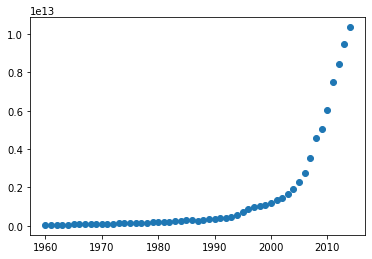

In [39]:
import matplotlib.pyplot as plt
plt.scatter(data["Year"],data["Value"])
plt.show()

In [47]:
x=data["Year"].values.reshape(-1,1)
y=data["Value"].values


In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [50]:
y_pred=model.predict(x_poly)

In [51]:
r2_score(y,y_pred)*100

96.45101047000898

In [54]:
mean_squared_error(y,y_pred)

2.177936487194082e+23

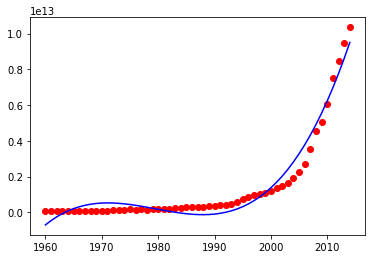

In [56]:
plt.scatter(data["Year"],data["Value"],c="red")
plt.plot(x,y_pred,c="blue")
plt.show()

In [57]:
acc=[]
for i in range(2,20):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [58]:
acc

[84.24443474171446,
 96.45101047000898,
 96.5120230215125,
 96.57218086535269,
 96.63149021194226,
 96.68995728675763,
 96.74758835356721,
 96.80438971170584,
 96.86036769344585,
 96.9155286654676,
 96.96987902292203,
 97.02342519173827,
 97.07617362685119,
 97.12813080732198,
 97.17930323901378,
 97.22969745112273,
 97.27931999533536,
 97.32817744349673]

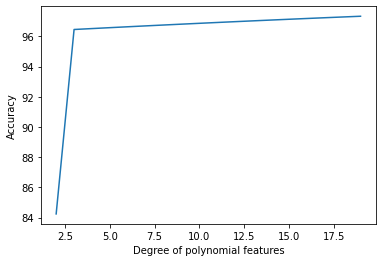

In [61]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel('Accuracy')
plt.show()